# Exploratory Data Analysis

In [1]:
import pandas as pd

path = "data/learning-equality-curriculum-recommendations"
topics_df = pd.read_csv(f"{path}/topics.csv")
content_df = pd.read_csv(f"{path}/content.csv")
correlations_df = pd.read_csv(f"{path}/correlations.csv")

### Topics DataFrame

In [2]:
topics_df.sample(n=5, random_state=42)

,id,title,description,channel,category,level,language,parent,has_content
46585,t_9c187b338e4b,পাঁচ অংকের সংখ্যা,NaN,36068f,aligned,4,bn,t_40a9a574bc1c,True
17263,t_39ea124896a1,Adding & subtracting rational numbers,We're going to mix it up a little in this set ...,0ec697,source,4,en,t_6420004958c0,True
56142,t_bbac34962bbf,Plants and Animals,B2.2.1.2\tDemonstrate understanding of element...,0a9df7,aligned,3,en,t_fd97cc216bc5,True
29776,t_639930e1909b,"""مَيْمونَةُ"" في إِثْيوبْيا",NaN,7b47c5,source,4,ar,t_5c935eadb393,True
65301,t_d9e41c8a030d,Kutoa desimali,"Chochote unachoweza kufanya na namba nzima , u...",0c929f,source,4,sw,t_43f0f6531367,True


In [3]:
"""
Columns with null values:
- title
- description (almost half of the topic ids have description)
- parent
"""

topics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76972 entries, 0 to 76971
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           76972 non-null  object
 1   title        76970 non-null  object
 2   description  34953 non-null  object
 3   channel      76972 non-null  object
 4   category     76972 non-null  object
 5   level        76972 non-null  int64 
 6   language     76972 non-null  object
 7   parent       76801 non-null  object
 8   has_content  76972 non-null  bool  
dtypes: bool(1), int64(1), object(7)
memory usage: 4.8+ MB


In [4]:
# Describe categorical variables

topics_df.describe(include='object')

,id,title,description,channel,category,language,parent
count,76972,76970,34953,76972,76972,76972,76801
unique,76972,45082,23067,171,3,28,17512
top,t_00004da3a1b2,Assessments,v0.1,fef095,source,en,t_344131c2889b
freq,1,558,371,5770,43487,36161,270


In [5]:
"""
Categories are unbalanced.
- source: Original content creator.
- aligned: Content aligned from multiple sources.
- supplemental: Aligned extent.
"""

topics_df.category.value_counts()

category
source          43487
supplemental    19368
aligned         14117
Name: count, dtype: int64

### Content DataFrame

In [6]:
content_df.sample(n=5, random_state=42)

,id,title,description,kind,text,language,copyright_holder,license
1943,c_035ca90fce31,Pasandida adakaar,source_url=http://www.prathamopenschool.org/Co...,video,NaN,ur,NaN,NaN
7473,c_0c80eac52f35,11.1.2-end-of-unit-assessment-11.1.2.l25.pdf,11.1.2-end-of-unit-assessment-11.1.2.l25.pdf,document,NYS Common Core ELA & Literacy Curriculum\n\nG...,es,Engage NY,CC BY-NC-SA
28272,c_2ede3220832b,कल्पनाशीलता का उपयोग करना : बीजगणितीय सर्वसमिक...,NaN,document,dYiuk’khyrk dk mi;ksx djuk: chtxf.krh; loZlfed...,hi,The Open University,CC BY-NC-SA
6031,c_0a2abb6566ed,Electrical conduction in heart cells,NaN,video,-Let's talk about electrical conduction in hea...,en,Khan Academy,CC BY-NC-SA
116703,c_c1addc86cdf2,Една и съща скорост с различни мерни единици,Сал показва как можем да представим скоростта ...,video,NaN,bg,NaN,NaN


In [7]:
"""
Columns with null values:
- title
- description       (more than half of the content ids have description)
- text              (less than half of the content ids have text)
- copyright_holder  (less than half of the content ids have copyright_holder)
- license           (less than half of the content ids have license)
"""

content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154047 entries, 0 to 154046
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                154047 non-null  object
 1   title             154038 non-null  object
 2   description       89456 non-null   object
 3   kind              154047 non-null  object
 4   text              74035 non-null   object
 5   language          154047 non-null  object
 6   copyright_holder  71821 non-null   object
 7   license           74035 non-null   object
dtypes: object(8)
memory usage: 9.4+ MB


### Correlations DataFrame

In [8]:
correlations_df.sample(n=5, random_state=42)

,topic_id,content_ids
15767,t_42815751d389,c_51975483e3bd c_abdbed326895
29156,t_79f66fa1ab3e,c_628b94a51fef
47487,t_c661006df3b7,c_a42f81c1db4f
4519,t_13047d953c48,c_1e28eb99814a c_4092e9657506 c_a3e140eb1f60 c...
4162,t_117c91f1f343,c_c6759113f661 c_f095cb4908d4


In [9]:
# There are no null values in correlations_df
correlations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61517 entries, 0 to 61516
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   topic_id     61517 non-null  object
 1   content_ids  61517 non-null  object
dtypes: object(2)
memory usage: 961.3+ KB


In [10]:
# Topic_id column does have duplicate values
correlations_df.describe(include='object')

,topic_id,content_ids
count,61517,61517
unique,61517,47299
top,t_00004da3a1b2,c_dd739e116435
freq,1,122


In [ ]:
# Skip this cell in the first instance
# Run if you get an error in the following cell related to matplotlib-inline "ValueError: Key backend"
%pip install --upgrade matplotlib-inline

       count_content_id
count      61517.000000
mean           4.550271
std            6.700255
min            1.000000
25%            2.000000
50%            3.000000
75%            5.000000
max          293.000000
Number of topics with more than 5 content_ids: 15127

Number of topics with less than or equal to 5 content_ids: 46390


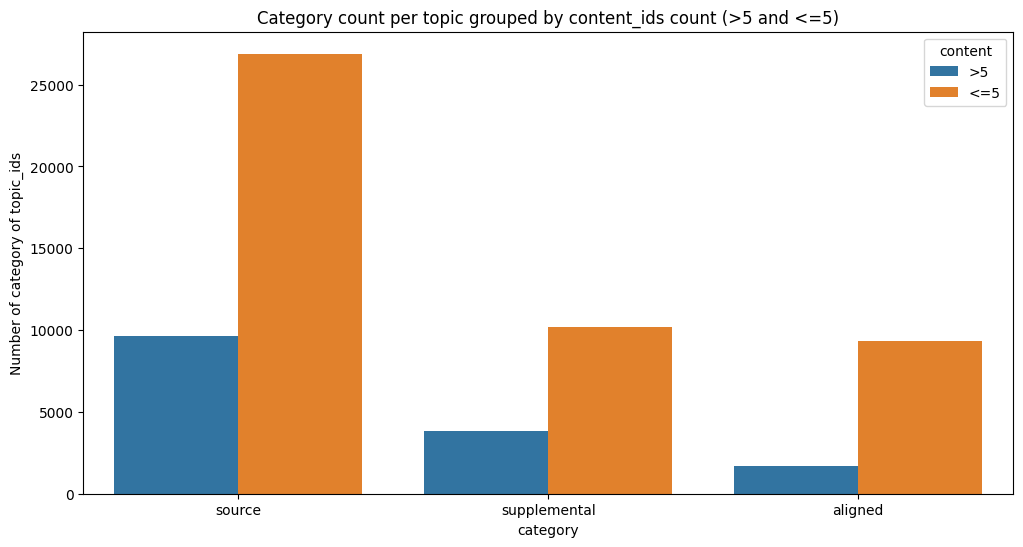

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

correlations_df["count_content_id"] = correlations_df["content_ids"].apply(
    lambda x: len(str(x).split(sep=" "))
)
correlations_df.sort_values(by="count_content_id", ascending=False, inplace=True)
print(correlations_df.describe())

# Filter topics with more than 5 content_ids, Q4 75-100%
count_m_5 = sum(correlations_df["count_content_id"] > 5)
print(f"Number of topics with more than 5 content_ids: {count_m_5}")

x_m_5 = topics_df.set_index("id").loc[
    correlations_df["topic_id"].head(count_m_5), "category"
]

#Filter topics with less than or equal to 5 content_ids, 0-75%
count_el_5 = sum(correlations_df["count_content_id"] <= 5)
x_el_5 = topics_df.set_index("id").loc[
    correlations_df["topic_id"].tail(count_el_5), "category"
]

print(f"\nNumber of topics with less than or equal to 5 content_ids: {count_el_5}")

stacked_categories = pd.DataFrame({
    'category': pd.concat([x_m_5, x_el_5], ignore_index=True),
    'content': ['>5']*len(x_m_5) + ['<=5']*len(x_el_5)
})

plt.figure(figsize=(12,6))
sns.countplot(x='category', hue='content', data=stacked_categories)
plt.title("Category count per topic grouped by content_ids count (>5 and <=5)")
plt.ylabel("Number of category of topic_ids")
plt.show()

In [12]:
correlations = correlations_df.copy()
correlations["content_ids"] = correlations["content_ids"].str.split()
correlations = correlations.explode("content_ids").rename(
    columns={"content_ids": "content_id"}
)
correlations["content_language"]= content_df.loc[content_df["id"].isin(correlations["content_id"].unique()), "language"]

correlations["topic_language"] = topics_df.loc[
    topics_df["id"].isin(correlations["topic_id"]), "language"
]

correlations_filtered = correlations[correlations["content_language"] == correlations["topic_language"]]
count_equal_language = correlations_filtered.groupby("topic_id")["content_language"].count()
content_lang_ratio = count_equal_language.rename("equal_language")


correlations = correlations.merge(content_lang_ratio, on="topic_id")
correlations["radio"] = (
    correlations["equal_language"] * 100 / correlations["count_content_id"]
)

fil = correlations.loc[correlations["radio"]!=100]
fil

,topic_id,content_id,count_content_id,content_language,topic_language,equal_language,radio


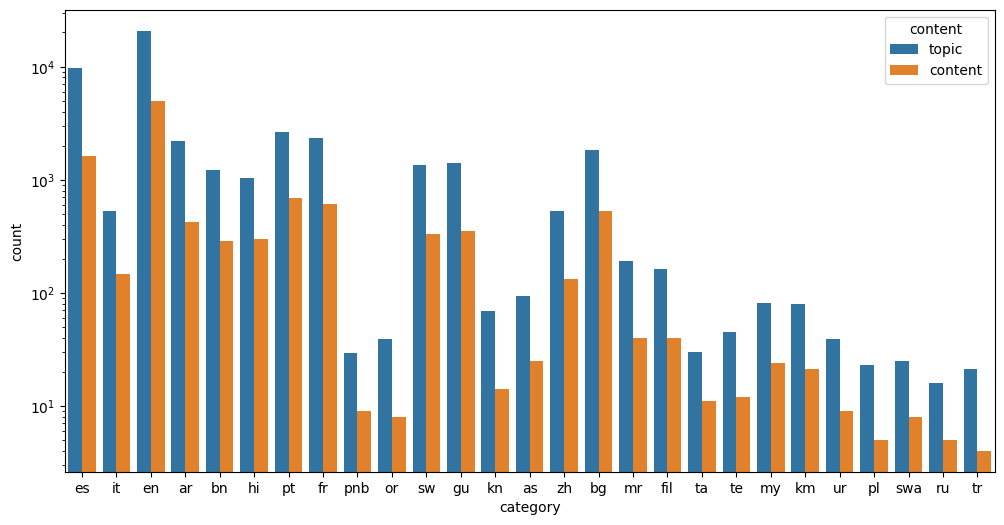

In [15]:
content_ids_l_5 = correlations_df.loc[correlations_df["count_content_id"] <= 5, "content_ids"]

content_lang = content_df.loc[content_df["id"].isin(content_ids_l_5), "language"]

topic_lang = topics_df.loc[
    topics_df["id"].isin(correlations_df["topic_id"].head(count_el_5)),"language"
]

stacked_categories = pd.DataFrame(
    {
        "category": pd.concat([content_lang, topic_lang], ignore_index=True),
        "content": ["topic"] * len(topic_lang) + ["content"] * len(content_lang),
    }
)

plt.figure(figsize=(12, 6))
sns.countplot(x=stacked_categories["category"], hue=stacked_categories["content"]).set_yscale("log")
plt.show()